# Generate summary statistics for figure 3.

In [26]:
# General dependencies
import numpy as np
from matplotlib import pyplot as plt
import pickle as pkl
import os
from math import isnan

In [43]:
# This is where to find the data
data_dir = "/Volumes/condor/lthomas/Projects/Thesis_analysis/STRF_SMRF_PKLs_2512"

# Read all the pkl files in the data directory
data_files = [f for f in os.listdir(data_dir) if f.endswith('.pkl')]



In [ ]:
# Open one data file to check it out
file_path = os.path.join(data_dir, data_files[0])
with open(file_path, 'rb') as infile:
    dataFrame  = pkl.load(infile)
dataFrame.keys()

Index(['nwb_file_identifier', 'unit', 'r2Ceil', 'r2segModel', 'r2segIDModelLG',
       'r2segIDModelDG', 'r2segIDModelLGMPS', 'r2segIDModelDGMPS', 'r2STRF',
       'snr', 'f', 'snrEstf', 'cumInfo', 'totWeight', 'Laguerre_args',
       'dogs_args', 'pca_spect', 'pca_mps', 'strfModel', 'segModel',
       'segIDModelLG', 'segIDModelDG', 'segIDModelLGMPS', 'segIDModelDGMPS',
       'unit_id', 'error', 'nwb_file', 'bird'],
      dtype='object')

In [ ]:
# Some rows have Nan?  Like row for unit_id 6 in this first file
for i, row in dataFrame.iterrows():
    if not isnan(row['snr']):
        print(row['bird'], row['unit_id'], row['snr'], row['cumInfo'][-1])

XXXLbl116XF 0 0.20320140862572209 12.854322601878135
XXXLbl116XF 1 0.29850280252344513 22.167637182193833
XXXLbl116XF 2 0.17277894870124805 16.187519792394898
XXXLbl116XF 3 0.08672545608805186 5.918552325438442
XXXLbl116XF 4 0.1466952034216828 7.080080433407732
XXXLbl116XF 5 0.053373375860158064 2.2277453692240137
XXXLbl116XF 7 0.3317059755697242 20.350909401328394
XXXLbl116XF 8 0.18818018625130725 5.427422546275835
XXXLbl116XF 9 0.15365924132517145 12.522597323744318
XXXLbl116XF 10 0.15113669656912052 8.2264452449781
XXXLbl116XF 11 0.24855586272556013 11.666850966949957
XXXLbl116XF 12 0.13814367889729892 5.547020562660012
XXXLbl116XF 13 0.0980385064172103 4.145370101430937
XXXLbl116XF 14 0.1083307880833655 8.787998587370533
XXXLbl116XF 15 0.10209581105653724 3.746154040262159
XXXLbl116XF 16 0.07185208859181362 2.54226274978656
XXXLbl116XF 17 0.19684353752984426 22.525208166107276
XXXLbl116XF 18 0.06290917336182246 1.8502214826599226
XXXLbl116XF 19 0.0543584081286339 2.1704750693386576

In [52]:
# make historgram of snr and infos

snrs = []
infos = []
units = []
birds = []
rate = []
data_length = []

for f in data_files:
    file_path = os.path.join(data_dir, f)
    with open(file_path, 'rb') as infile:
        dataFrame  = pkl.load(infile)
    
    for i, row in dataFrame.iterrows():
        if not isnan(row['snr']):
            snrs.append(row['snr'])
            infos.append(row['cumInfo'][-1])
            units.append(row['unit_id'])
            birds.append(row['bird'])  
            rate.append(row['segModel']['yavg'])
            data_length.append(row['totWeight'])

snrs = np.array(snrs)
infos = np.array(infos)
rate = np.array(rate)
data_length = np.array(data_length) 



/var/folders/zn/qkxxn59x2712k0l7j64f7ry40000gn/T/ipykernel_41704/2787930888.py:13: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  dataFrame  = pkl.load(infile)
/Users/frederictheunissen/opt/anaconda3/envs/spikesort/lib/python3.12/site-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.6.1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_pe

Number of units with SNR > 0.1 and Information > 3.0 and Rate > 2.0 and Data Length > 200000.0: 732


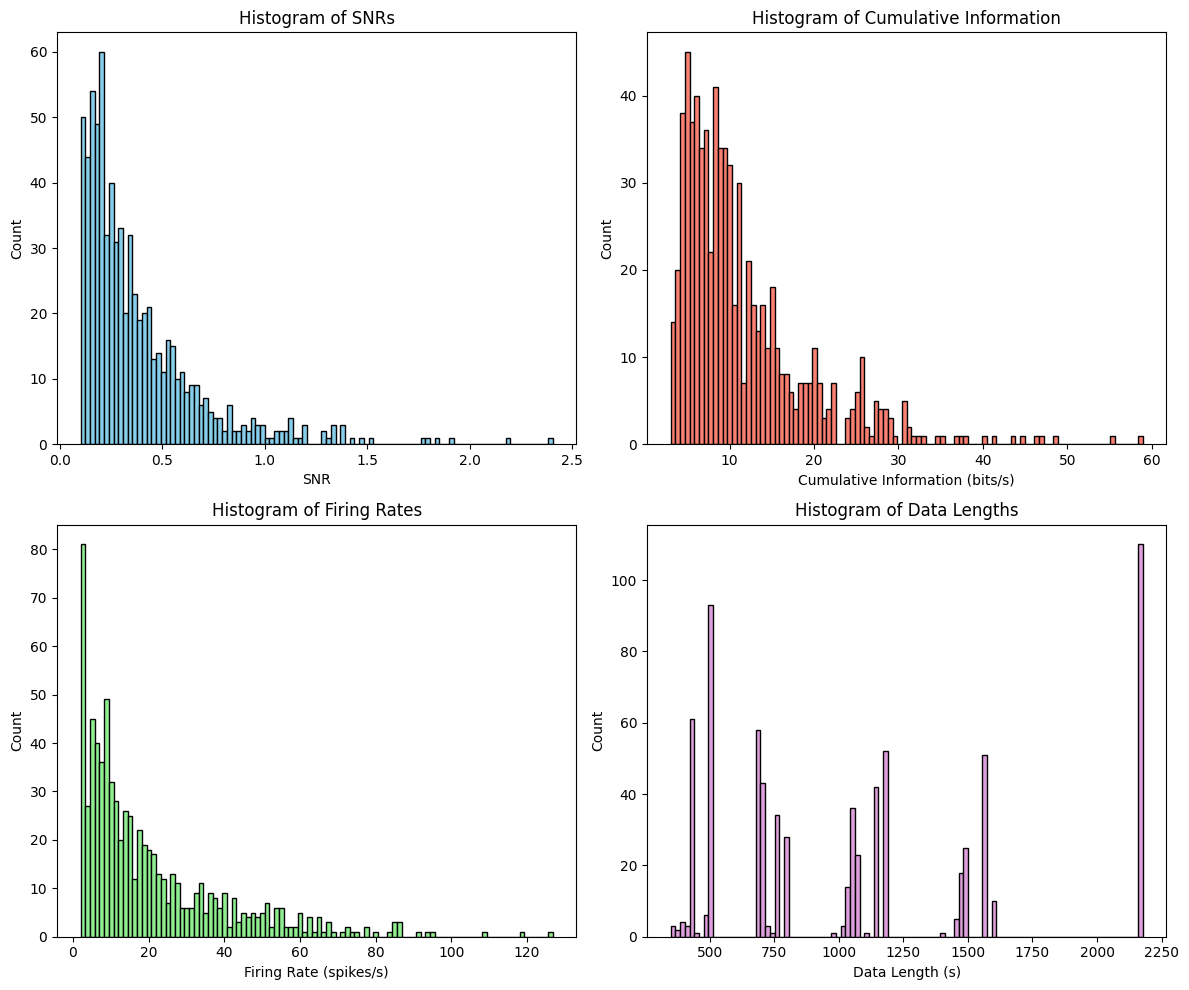

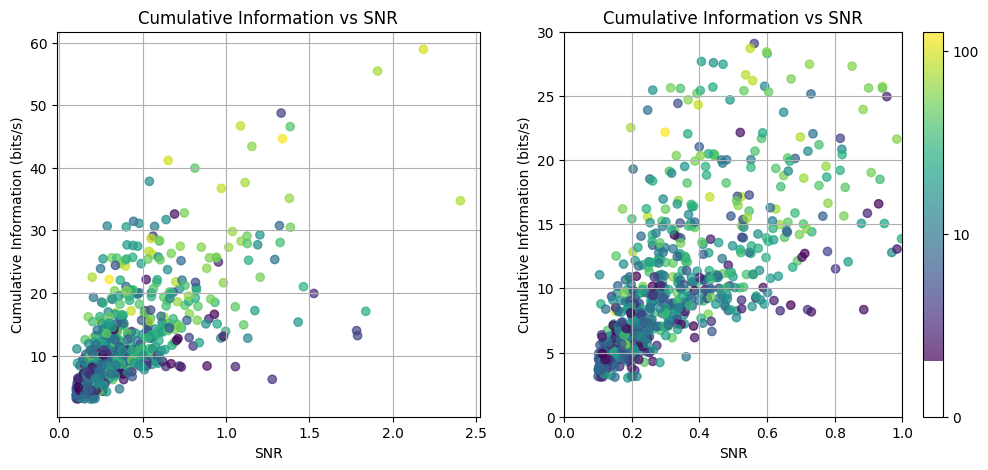

In [71]:
# Plot histograms
# We need to figure out thresholds for auditory units.  I propose this:
information_threshold = 3.0 # in bits/s
snr_threshold = 0.1 # unitless
rate_threshold = 2.0 # average evoked rate in spikes/s
data_length_threshold = 200.0 * 1000 # number of ms bins.  Here 200 seconds of data ~ 10 trials of 10 songs each aprox 2 seconds long

idx = (snrs > snr_threshold) & (infos > information_threshold) & (rate > rate_threshold) & (data_length > data_length_threshold)
print(f"Number of units with SNR > {snr_threshold} and Information > {information_threshold} and Rate > {rate_threshold} and Data Length > {data_length_threshold}: {np.sum(idx)}")

plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
plt.hist(snrs[idx], bins=100, color='skyblue', edgecolor='black')
plt.title('Histogram of SNRs')
plt.xlabel('SNR')
plt.ylabel('Count')
plt.subplot(2, 2, 2)
plt.hist(infos[idx], bins=100, color='salmon', edgecolor='black')
plt.title('Histogram of Cumulative Information')
plt.xlabel('Cumulative Information (bits/s)')
plt.ylabel('Count')
plt.subplot(2, 2, 3)
plt.hist(rate[idx], bins=100, color='lightgreen', edgecolor='black')
plt.title('Histogram of Firing Rates')
plt.xlabel('Firing Rate (spikes/s)')
plt.ylabel('Count')
plt.subplot(2, 2, 4)
plt.hist(data_length[idx]/1000, bins=100, color='plum', edgecolor='black')
plt.title('Histogram of Data Lengths')
plt.xlabel('Data Length (s)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


# Scatter plot of cumulative information vs SNR colored by rate

plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.scatter(snrs[idx], infos[idx], c = np.log(rate[idx]), cmap ='viridis', alpha=0.7)
plt.title('Cumulative Information vs SNR')
plt.xlabel('SNR')
plt.ylabel('Cumulative Information (bits/s)')
plt.grid(True)
plt.subplot(1,2,2)
plt.scatter(snrs[idx], infos[idx], c = np.log10(rate[idx]), cmap ='viridis', alpha=0.7)
plt.title('Cumulative Information vs SNR')
plt.xlim((0.0, 1.0))
plt.xlabel('SNR')
plt.ylim((0.0, 30.0))
plt.ylabel('Cumulative Information (bits/s)')
cbar = plt.colorbar()
tickvalues = cbar.get_ticks()
cbar.set_ticks([0, 1.0, 2.0])
cbar.set_ticklabels([0, 10, 100])
plt.grid(True)

plt.show()

In [46]:
row['segModel']['yavg']

np.float64(2.0709826662528354)